In [22]:
from langchain.agents import create_agent
from langchain.agents.middleware import before_agent, before_model, AgentState, after_agent
from langgraph.runtime import Runtime
from langchain.tools import tool

@before_agent
def try_before(state:AgentState, runtime:Runtime):
    """after agent"""
    print(f"state : {len(state["messages"])}")
    print(f"runtime : {runtime}")

@tool
def get_weather(location:str):
    """Get the current weather of the location"""
    return f"The current weather of {location} is sunny"


agent = create_agent(
    model="gpt-5-nano",
    middleware=[try_before],
    tools=[get_weather]
)

In [23]:
agent.invoke({"messages": "What is the weather in Kochi"}, context={"username": "sachin"})

state : 1
runtime : Runtime(context={'username': 'sachin'}, store=None, stream_writer=<function Pregel.stream.<locals>.stream_writer at 0x11091f2e0>, previous=None)


{'messages': [HumanMessage(content='What is the weather in Kochi', additional_kwargs={}, response_metadata={}, id='cb7ec26e-4849-45ab-afed-c5cb2a343bca'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 133, 'total_tokens': 286, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D4op5W9AwBw4LJvrlsX8e0eNdjJf7', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c1eaa-f7f9-78e0-a390-70ef64357196-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'Kochi'}, 'id': 'call_AjdpsBebSLoZNexkoPrVcfZ9', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 133, 'output_to

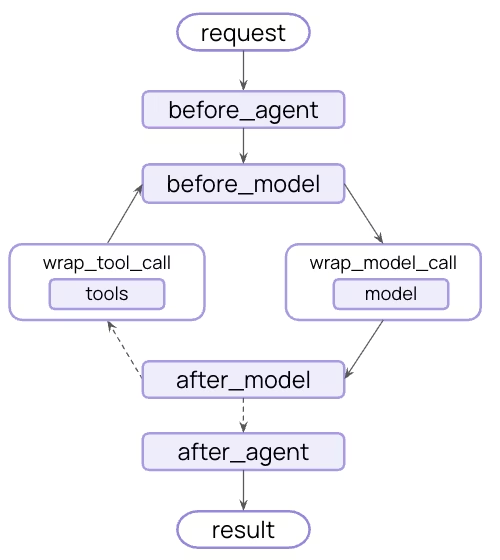

In [6]:
from PIL import Image
img = Image.open("middleware_final.avif")

img


In [ ]:
from langchain.agents import create_agent
from langchain.agents.middleware import before_agent, before_model, after_agent, after_model, AgentState
from langgraph.runtime import Runtime
from langgraph.checkpoint.memory import InMemorySaver

@before_agent(can_jump_to="end")  # only execute one time per invocation
def try_before_agent(state:AgentState, runtime:Runtime):
    print("Messages", state["messages"])
    print("Runtime: ", runtime)

    if runtime.context["username"] == "sam":
        # print("Its sam calling")
        return {
            "jump_to" : "end"
        }
    if state["messages"][-1].type == "human":
        print("Its a human calling")




agent = create_agent(
    model="gpt-5-nano",
    middleware=[try_before_agent],
    checkpointer=InMemorySaver()
)

In [30]:
config = {"configurable": {"thread_id": "100"}}
agent.invoke({"messages": "Hello"}, context={"username" :"ram"}, config=config)

Messages [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='73c999c9-babe-4eb1-9e2f-a8c468f220a7')]
Runtime:  Runtime(context={'username': 'ram'}, store=None, stream_writer=<function Pregel.stream.<locals>.stream_writer at 0x12b28d4e0>, previous=None)
Its a human calling


{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='73c999c9-babe-4eb1-9e2f-a8c468f220a7'),
  AIMessage(content='Hi there! How can I help today? I can answer questions, explain concepts, help with writing or coding, brainstorm ideas, plan tasks, or just chat. Tell me what you’re interested in or give me a specific task, and I’ll get started.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 446, 'prompt_tokens': 7, 'total_tokens': 453, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 384, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D53A6HA3mNvalgziZA1iOfn73zmoG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c21f4-0068-74a0-add6-a5fd0e51c0d6-0', 

In [31]:
agent.invoke({"messages": "who are you?"}, context={"username" :"ram"}, config=config)

Messages [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='73c999c9-babe-4eb1-9e2f-a8c468f220a7'), AIMessage(content='Hi there! How can I help today? I can answer questions, explain concepts, help with writing or coding, brainstorm ideas, plan tasks, or just chat. Tell me what you’re interested in or give me a specific task, and I’ll get started.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 446, 'prompt_tokens': 7, 'total_tokens': 453, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 384, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D53A6HA3mNvalgziZA1iOfn73zmoG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c21f4-0068-74a0-add6-a5fd0e51c0d6-0', tool_c

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='73c999c9-babe-4eb1-9e2f-a8c468f220a7'),
  AIMessage(content='Hi there! How can I help today? I can answer questions, explain concepts, help with writing or coding, brainstorm ideas, plan tasks, or just chat. Tell me what you’re interested in or give me a specific task, and I’ll get started.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 446, 'prompt_tokens': 7, 'total_tokens': 453, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 384, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D53A6HA3mNvalgziZA1iOfn73zmoG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c21f4-0068-74a0-add6-a5fd0e51c0d6-0', 